# Telecomm Customer Churn Analysis

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale,LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading dataset
Tcus=pd.read_csv('Telecom_customer_churn.csv')
Tcus.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#converting columns having numeric values to numeric datatype
Tcus = Tcus.convert_objects(convert_numeric=True)
Tcus.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [4]:
Tcus['tenure'].describe()
#maximum tenure in 72months, minimum 0 months

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [5]:
Tcus.tenure.median()

29.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002537F4F9978>]],
      dtype=object)

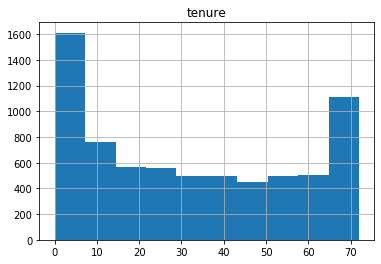

In [6]:
Tcus.hist('tenure')
#most of the customers having contract tenure between 9 to 65 months

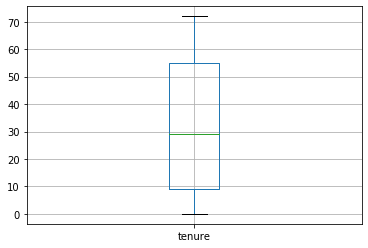

In [7]:
Tcus.boxplot('tenure')


In [8]:
Tcus.Contract.value_counts(normalize='True')
# 55% customers contract type is mon to month , 24% customers two year contract , 20% customers  one year contract

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64

In [9]:
Tcus.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [10]:
Tcus.TotalCharges.median()

1397.475

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002537F67ED30>]],
      dtype=object)

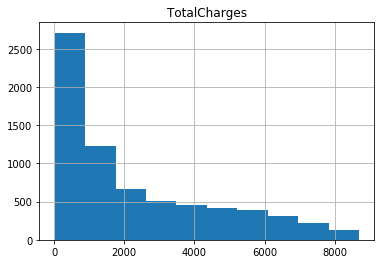

In [11]:
Tcus.hist('TotalCharges')

In [12]:
#filling nll values with median 
Tcus.TotalCharges.fillna(value=Tcus.TotalCharges.median(),inplace=True)

In [13]:
Tcus.TotalCharges.isnull().sum()

0

In [14]:
pd.crosstab(Tcus.gender,Tcus.Churn)
#13%females,13% male are moving out

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [15]:
pd.crosstab(Tcus.InternetService,Tcus.Churn)
#those customers having internet services are moving out

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


In [16]:
pd.crosstab(Tcus.Contract,Tcus.Churn)
#maximum of the customers with contact type month -to -month are moving out

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


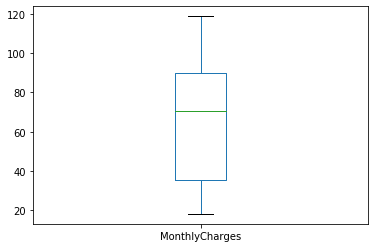

In [17]:
Tcus.plot(x='Churn',y='MonthlyCharges',kind='box')

In [18]:
Tcus[['tenure','MonthlyCharges']].corr()

,tenure,MonthlyCharges
tenure,1.0000,0.2479
MonthlyCharges,0.2479,1.0000


In [19]:
pd.crosstab([Tcus.gender,Tcus.SeniorCitizen],Tcus.Churn)
#Young age customers are moving out

Churn                   No  Yes
gender SeniorCitizen           
Female 0              2221  699
       1               328  240
Male   0              2287  694
       1               338  236

In [20]:

Tcus.groupby(['Contract','Churn']).tenure.mean()
#irrespictive of contract type higher the tenure the more churning

Contract        Churn
Month-to-month  No       21.033333
                Yes      14.016918
One year        No       41.674063
                Yes      44.963855
Two year        No       56.602914
                Yes      61.270833
Name: tenure, dtype: float64

In [21]:
Tcus.groupby(['Contract','PaymentMethod','Churn']).tenure.mean()
#customers whose payment method is automatic bank transfer, credit card are moving out

Contract        PaymentMethod              Churn
Month-to-month  Bank transfer (automatic)  No       27.855670
                                           Yes      19.208955
                Credit card (automatic)    No       25.808219
                                           Yes      20.157303
                Electronic check           No       22.414720
                                           Yes      14.144869
                Mailed check               No       11.913257
                                           Yes       5.989362
One year        Bank transfer (automatic)  No       46.104816
                                           Yes      45.210526
                Credit card (automatic)    No       45.109244
                                           Yes      48.682927
                Electronic check           No       45.674912
                                           Yes      48.406250
                Mailed check               No       29.181529
                     

# Model Building

In [22]:
Tcus['is_churn']=Tcus['Churn'].map({'No':0,'Yes':1})
Tcus.shape

(7043, 22)

In [23]:
#converting columns having numeric values to numeric datatype
Tcus = Tcus.convert_objects(convert_numeric=True)
Tcus.dtypes
#filling nll values with median 
Tcus.TotalCharges.fillna(value=Tcus.TotalCharges.median(),inplace=True)

In [24]:

x=Tcus[['tenure','Contract','InternetService','TotalCharges']]
le = LabelEncoder()
for i in x.columns:
    if x[i].dtype=='object':
        le.fit(x[i])
        x[i]=le.transform(x[i])
x=scale(x)
y=Tcus['is_churn']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

max_r_score=0
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state, test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print('r2_score corresponding to random state:',r_state, 'is:',r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('max r2 score corresponding to', final_r_state, 'is', max_r_score)

r2_score corresponding to random state: 42 is: 0.1971723584827152
r2_score corresponding to random state: 43 is: 0.187064926136862
r2_score corresponding to random state: 44 is: 0.17459075397334867
r2_score corresponding to random state: 45 is: 0.18077710116327383
r2_score corresponding to random state: 46 is: 0.18519687268425866
r2_score corresponding to random state: 47 is: 0.17303512917659825
r2_score corresponding to random state: 48 is: 0.18327832489251128
r2_score corresponding to random state: 49 is: 0.18463473953817622
r2_score corresponding to random state: 50 is: 0.16440684607507405
r2_score corresponding to random state: 51 is: 0.18753571159023819
r2_score corresponding to random state: 52 is: 0.18382070233050252
r2_score corresponding to random state: 53 is: 0.18167109229154144
r2_score corresponding to random state: 54 is: 0.1675421497437578
r2_score corresponding to random state: 55 is: 0.19729786871896415
r2_score corresponding to random state: 56 is: 0.18775971129093139

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=83)

In [27]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_test=lr.predict(x_test)
Explained_Cov=lr.score(x_test,y_test)
print("exaplained covarinace is {}".format(Explained_Cov))

exaplained covarinace is 1.0


In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score,jaccard_similarity_score
mse=mean_squared_error(y_test,y_pred,multioutput='uniform_average')
print("mse is {}".format(mse))
mae=mean_absolute_error(y_test,y_pred,multioutput='uniform_average')
print('mae is {}'.format(mae))
rsc=r2_score(y_test,y_pred)
print("r2 score is {}".format(rsc))

mse is 0.1961524531557884
mae is 0.37312031573798027
r2 score is -0.2958389238224395


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
lr = LogisticRegression()

scores=cross_val_score(lr,x,y,cv=5)
print('scores:',scores)
print('Mean:',scores.mean())
print('Standard Deviation:',scores.std())

scores: [0.78779276 0.76295245 0.77217885 0.78211498 0.78891258]
Mean: 0.7787903229467587
Standard Deviation: 0.009890471412940605


NotFittedError: Call fit before prediction

In [34]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,y_pred)
roc_area=auc(false_positive_rate,true_positive_rate)
print("area under the curve is {}". format(roc_area))

area under the curve is 0.4856678890168179


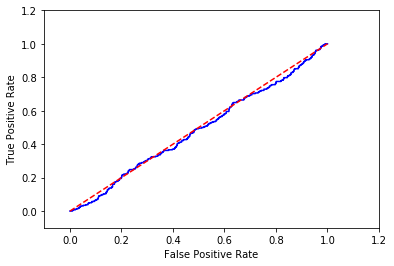

In [35]:

plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC ' % roc_area)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [36]:
CVscore=cross_val_score(LogisticRegression(),x,y,cv=10)
print(CVscore)
print(CVscore.mean())

[0.78723404 0.78723404 0.76170213 0.76595745 0.78125    0.76278409
 0.80113636 0.76846591 0.76988636 0.80512091]
0.7790771297231263


In [37]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200,random_state=45)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred=rf.predict(x_test)
pred

array([0.495     , 0.005     , 0.105     , ..., 0.        , 0.35383333,
       0.095     ])

In [38]:
from sklearn.externals import joblib
joblib.dump(lr,'telecome_customer_churn.pkl')

['telecome_customer_churn.pkl']